In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import time
import os
from PIL import Image

from PIL import Image

In [18]:
folder = 'C:/Users/oryan/Documents/esac-project/cutouts/hubble-training-all'
save_folder = 'C:/Users/oryan/Documents/esac-project/manifests'

In [3]:
manifest_paths = glob.glob(folder + '/*.csv')

In [4]:
manifest_paths

['C:/Users/oryan/Documents/esac-project/cutouts/hubble-training-all\\gzm-image-manifest.csv',
 'C:/Users/oryan/Documents/esac-project/cutouts/hubble-training-all\\hubble-thumb-manifest.csv']

In [8]:
manifest_gz = pd.read_csv(manifest_paths[1],index_col = 0).reset_index().rename(columns={'index':'zooniverse_id'})
manifest_gzm = pd.read_csv(manifest_paths[0],index_col = 0).reset_index().rename(columns={'index':'zooniverse_id','thumbnail_loc':'thumbnail_path'})
manifest_gz_answer = pd.read_csv('C:/Users/oryan/Documents/esac-project/manifests/gz-hubble-local-manifest.csv',index_col = 0)[['zooniverse_id','interacting']]

### Combining the GZ and GZM Manifest

In [9]:
manifest_gz_answer

,zooniverse_id,interacting
5895,AHZ10004js,1
8646,AHZ20000ak,1
8813,AHZ20000f7,1
8875,AHZ20000gx,1
8897,AHZ20000hj,1
...,...,...
82467,AHZ2001l95,0
42067,AHZ2000q2x,0
21547,AHZ2000a8x,0
26668,AHZ2000e76,0


In [10]:
manifest_gz_merg = manifest_gz.merge(manifest_gz_answer, on='zooniverse_id',how='left')

In [11]:
manifest_gz_merg

,zooniverse_id,thumbnail_path,interacting
0,AHZ10004js,/mmfs1/scratch/hpc/60/oryan/fromMAST/thumbnail...,1
1,AHZ20000ak,/mmfs1/scratch/hpc/60/oryan/fromMAST/thumbnail...,1
2,AHZ20000f7,/mmfs1/scratch/hpc/60/oryan/fromMAST/thumbnail...,1
3,AHZ20000gx,/mmfs1/scratch/hpc/60/oryan/fromMAST/thumbnail...,1
4,AHZ20000hj,/mmfs1/scratch/hpc/60/oryan/fromMAST/thumbnail...,1
...,...,...,...
545,AHZ2001l95,/mmfs1/scratch/hpc/60/oryan/fromMAST/thumbnail...,0
546,AHZ2000q2x,/mmfs1/scratch/hpc/60/oryan/fromMAST/thumbnail...,0
547,AHZ2000a8x,/mmfs1/scratch/hpc/60/oryan/fromMAST/thumbnail...,0
548,AHZ2000e76,/mmfs1/scratch/hpc/60/oryan/fromMAST/thumbnail...,0


In [12]:
manifest_gzm_ans = manifest_gzm.assign(interacting = 1)

In [13]:
manifest_all = pd.concat([manifest_gz_merg, manifest_gzm_ans])

In [14]:
manifest_all

,zooniverse_id,thumbnail_path,interacting
0,AHZ10004js,/mmfs1/scratch/hpc/60/oryan/fromMAST/thumbnail...,1
1,AHZ20000ak,/mmfs1/scratch/hpc/60/oryan/fromMAST/thumbnail...,1
2,AHZ20000f7,/mmfs1/scratch/hpc/60/oryan/fromMAST/thumbnail...,1
3,AHZ20000gx,/mmfs1/scratch/hpc/60/oryan/fromMAST/thumbnail...,1
4,AHZ20000hj,/mmfs1/scratch/hpc/60/oryan/fromMAST/thumbnail...,1
...,...,...,...
10,Arp256_Sec,/mmfs1/scratch/hpc/60/oryan/fromMAST/thumbnail...,1
11,Arp214_Sec,/mmfs1/scratch/hpc/60/oryan/fromMAST/thumbnail...,1
12,Arp239_Sec,/mmfs1/scratch/hpc/60/oryan/fromMAST/thumbnail...,1
13,Arp302_Sec,/mmfs1/scratch/hpc/60/oryan/fromMAST/thumbnail...,1


In [15]:
manifest_all_local = (
    manifest_all
    .assign(local_path = manifest_all.thumbnail_path.apply(lambda x: f'{folder}/{os.path.basename(x)}'))
)

In [19]:
manifest_all_local.to_csv(f'{save_folder}/hubble-loc-manifest.csv')

### Loop Through Manifest

In [20]:
manifest_all_local["my_interacting"] = ""

In [21]:
counter = 0

In [1200]:
path = manifest_all_local.local_path.iloc[counter]
im = Image.open(path)
im

IndexError: single positional indexer is out-of-bounds

In [1199]:
manifest_all_local["my_interacting"].iloc[counter] = 1
print(100*(counter/len(manifest_all_local)))
counter += 1

99.82300884955752


In [1045]:
manifest_all_local

,zooniverse_id,thumbnail_path,interacting,local_path,my_interacting
0,AHZ10004js,/mmfs1/scratch/hpc/60/oryan/fromMAST/thumbnail...,1,C:/Users/oryan/Documents/esac-project/cutouts/...,1
1,AHZ20000ak,/mmfs1/scratch/hpc/60/oryan/fromMAST/thumbnail...,1,C:/Users/oryan/Documents/esac-project/cutouts/...,1
2,AHZ20000f7,/mmfs1/scratch/hpc/60/oryan/fromMAST/thumbnail...,1,C:/Users/oryan/Documents/esac-project/cutouts/...,1
3,AHZ20000gx,/mmfs1/scratch/hpc/60/oryan/fromMAST/thumbnail...,1,C:/Users/oryan/Documents/esac-project/cutouts/...,1
4,AHZ20000hj,/mmfs1/scratch/hpc/60/oryan/fromMAST/thumbnail...,1,C:/Users/oryan/Documents/esac-project/cutouts/...,NaN
...,...,...,...,...,...
10,Arp256_Sec,/mmfs1/scratch/hpc/60/oryan/fromMAST/thumbnail...,1,C:/Users/oryan/Documents/esac-project/cutouts/...,
11,Arp214_Sec,/mmfs1/scratch/hpc/60/oryan/fromMAST/thumbnail...,1,C:/Users/oryan/Documents/esac-project/cutouts/...,
12,Arp239_Sec,/mmfs1/scratch/hpc/60/oryan/fromMAST/thumbnail...,1,C:/Users/oryan/Documents/esac-project/cutouts/...,
13,Arp302_Sec,/mmfs1/scratch/hpc/60/oryan/fromMAST/thumbnail...,1,C:/Users/oryan/Documents/esac-project/cutouts/...,


In [1189]:
manifest_all_local["my_interacting"].iloc[counter-1] = 0

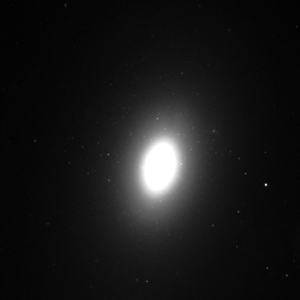

In [1188]:
path = manifest_all_local.local_path.iloc[counter-1]
im = Image.open(path)
im

In [1202]:
manifest_all_local.to_csv(f'{save_folder}/hubble-loc-manifest-unchecked.csv')

In [1388]:
dis_manifest = manifest_all_local.query('interacting != my_interacting')

In [1389]:
dis_manifest

,zooniverse_id,thumbnail_path,interacting,local_path,my_interacting
4,AHZ20000hj,/mmfs1/scratch/hpc/60/oryan/fromMAST/thumbnail...,1,C:/Users/oryan/Documents/esac-project/cutouts/...,NaN
6,AHZ20001y6,/mmfs1/scratch/hpc/60/oryan/fromMAST/thumbnail...,1,C:/Users/oryan/Documents/esac-project/cutouts/...,0
8,AHZ2000251,/mmfs1/scratch/hpc/60/oryan/fromMAST/thumbnail...,1,C:/Users/oryan/Documents/esac-project/cutouts/...,0
13,AHZ20002ta,/mmfs1/scratch/hpc/60/oryan/fromMAST/thumbnail...,1,C:/Users/oryan/Documents/esac-project/cutouts/...,0
16,AHZ20003s1,/mmfs1/scratch/hpc/60/oryan/fromMAST/thumbnail...,1,C:/Users/oryan/Documents/esac-project/cutouts/...,0
...,...,...,...,...,...
512,AHZ20000ek,/mmfs1/scratch/hpc/60/oryan/fromMAST/thumbnail...,0,C:/Users/oryan/Documents/esac-project/cutouts/...,1
514,AHZ2001jsf,/mmfs1/scratch/hpc/60/oryan/fromMAST/thumbnail...,0,C:/Users/oryan/Documents/esac-project/cutouts/...,1
540,AHZ2001ifb,/mmfs1/scratch/hpc/60/oryan/fromMAST/thumbnail...,0,C:/Users/oryan/Documents/esac-project/cutouts/...,1
2,Arp214_Prim,/mmfs1/scratch/hpc/60/oryan/fromMAST/thumbnail...,1,C:/Users/oryan/Documents/esac-project/cutouts/...,0


In [1391]:
manifest_all_local.interacting.value_counts()

0    310
1    255
Name: interacting, dtype: int64

In [1207]:
counter = 0

0


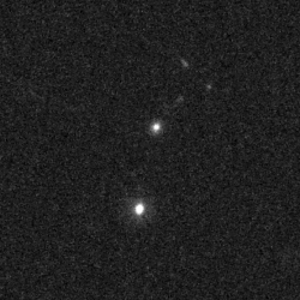

In [1383]:
path = dis_manifest.local_path.iloc[counter]
im = Image.open(path)
print(dis_manifest.my_interacting.iloc[counter])
counter += 1
im

In [1384]:
dis_manifest.iloc[counter-1]

zooniverse_id                                            AHZ2001fpq
thumbnail_path    /mmfs1/scratch/hpc/60/oryan/fromMAST/thumbnail...
interacting                                                       1
local_path        C:/Users/oryan/Documents/esac-project/cutouts/...
my_interacting                                                    0
Name: 207, dtype: object

In [1385]:
manifest_all_local.loc[207].my_interacting = 1

C:\Users\oryan\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
